In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

import config
import utils

# init params
fileConfig = config.FileConfig()
comConfig = config.CommonConfig()
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [2]:
train_df = pd.read_csv(fileConfig.csv_dir + fileConfig.file_train_pandas)

In [3]:
train_df.columns

Index(['Unnamed: 0', 'uid', 'mid', 'time', 'forward_count', 'comment_count',
       'like_count', 'content'],
      dtype='object')

In [4]:
train_df[comConfig.col_forward_count].describe()

count   1229618.00
mean          3.54
std          85.14
min           0.00
25%           0.00
50%           0.00
75%           0.00
max       41850.00
Name: forward_count, dtype: float64

In [5]:
train_df[comConfig.col_comment_count].describe()

count   1229618.00
mean          1.26
std          19.30
min           0.00
25%           0.00
50%           0.00
75%           0.00
max        7467.00
Name: comment_count, dtype: float64

In [6]:
train_df[comConfig.col_like_count].describe()

count   1229618.00
mean          2.22
std          41.20
min           0.00
25%           0.00
50%           0.00
75%           1.00
max       11871.00
Name: like_count, dtype: float64

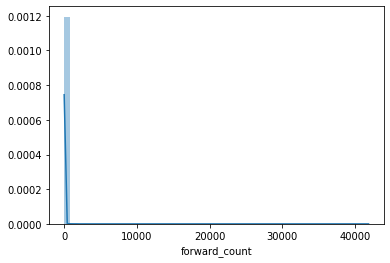

In [8]:
# histogram forward count
sns.distplot(train_df[comConfig.col_forward_count])

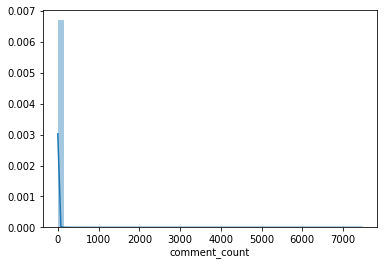

In [9]:
# histogram comment count
sns.distplot(train_df[comConfig.col_comment_count])

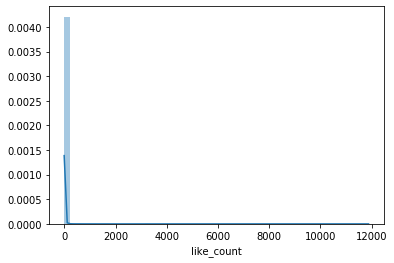

In [10]:
# histogram like count
sns.distplot(train_df[comConfig.col_like_count])

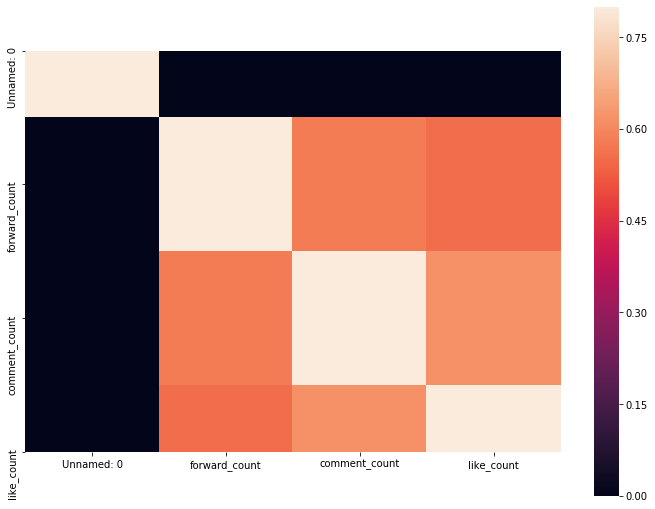

In [11]:
# correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [12]:
#skewness and kurtosis
print("Skewness: %f" % train_df[comConfig.col_forward_count].skew())
print("Kurtosis: %f" % train_df[comConfig.col_forward_count].kurt())

Skewness: 193.691908
Kurtosis: 65659.258439


In [15]:
quantitative = [f for f in train_df.columns if train_df.dtypes[f] != 'object']

In [16]:
quantitative

['Unnamed: 0', 'forward_count', 'comment_count', 'like_count']